In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test cifar 121



In [4]:
# Import the MNIST Autoencoder file
import CIFAR10_121  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=16,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

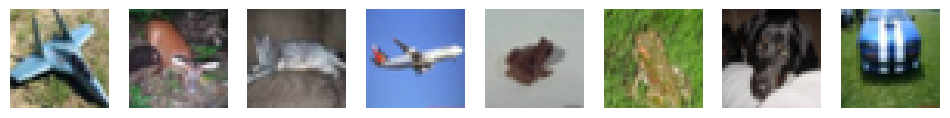

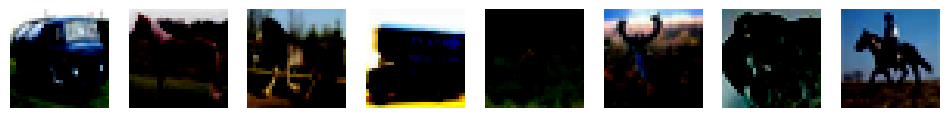

In [6]:
# Load dataset
train_loader, val_loader, test_loader = CIFAR10_121.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
model = CIFAR10_121.Autoencoder(args.latent_dim).to(args.device)

# Print model summary
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=4096, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=4096, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(256, 4, 4))
    (3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, mo

In [9]:
#Run a Single Forward Pass

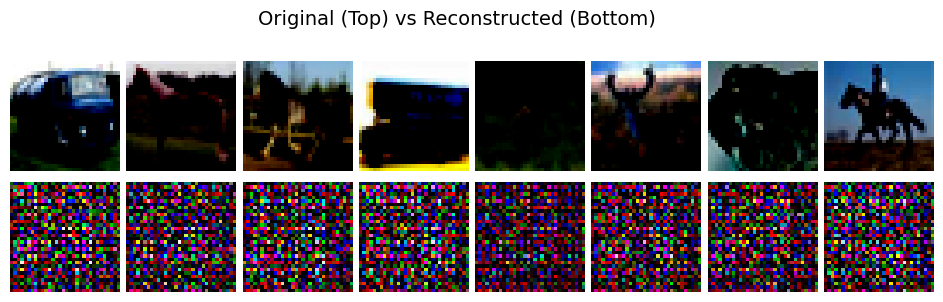

In [10]:
# Move images to the correct device
images_0_1 = images_0_1.to(args.device)

# Pass through the autoencoder
with torch.no_grad():
    recon_images_0_1 = model(images_0_1)

# Scale back to [0,255]
recon_images_0_255 = (recon_images_0_1 * 255)

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
plt.subplots_adjust(wspace=0, hspace=0.1)

# Add row titles manually
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    img = images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[0, i].imshow(img)  
    axes[0, i].axis("off")

    # Reconstructed images
    recon_img = recon_images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    recon_img = np.clip(recon_img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[1, i].imshow(recon_img)  
    axes[1, i].axis("off")

plt.show()


In [11]:
#Train for One Epoch to Check Loss Computation

In [12]:
CIFAR10_121.train_autoencoder(model, train_loader, val_loader, args, epochs=30)

Epoch [1/30], Train Loss: 0.1771, Val Loss: 0.1345


Epoch [2/30], Train Loss: 0.1322, Val Loss: 0.1177


Epoch [3/30], Train Loss: 0.1198, Val Loss: 0.1095


Epoch [4/30], Train Loss: 0.1136, Val Loss: 0.1076


Epoch [5/30], Train Loss: 0.1101, Val Loss: 0.1048


Epoch [6/30], Train Loss: 0.1077, Val Loss: 0.1047


Epoch [7/30], Train Loss: 0.1061, Val Loss: 0.1020


Epoch [8/30], Train Loss: 0.1048, Val Loss: 0.1007


Epoch [9/30], Train Loss: 0.1035, Val Loss: 0.1006


Epoch [10/30], Train Loss: 0.1023, Val Loss: 0.0988


Epoch [11/30], Train Loss: 0.1015, Val Loss: 0.0983


Epoch [12/30], Train Loss: 0.1008, Val Loss: 0.0976


Epoch [13/30], Train Loss: 0.1002, Val Loss: 0.0974


Epoch [14/30], Train Loss: 0.0997, Val Loss: 0.0978


Epoch [15/30], Train Loss: 0.0990, Val Loss: 0.0977


Epoch [16/30], Train Loss: 0.0986, Val Loss: 0.0978


Epoch [17/30], Train Loss: 0.0981, Val Loss: 0.0981


Epoch [18/30], Train Loss: 0.0977, Val Loss: 0.0973


Epoch [19/30], Train Loss: 0.0973, Val Loss: 0.0967


Epoch [20/30], Train Loss: 0.0968, Val Loss: 0.0962


Epoch [21/30], Train Loss: 0.0965, Val Loss: 0.0961


Epoch [22/30], Train Loss: 0.0963, Val Loss: 0.0963


Epoch [23/30], Train Loss: 0.0959, Val Loss: 0.0969


Epoch [24/30], Train Loss: 0.0957, Val Loss: 0.0956


Epoch [25/30], Train Loss: 0.0954, Val Loss: 0.0956


Epoch [26/30], Train Loss: 0.0951, Val Loss: 0.0957


Epoch [27/30], Train Loss: 0.0949, Val Loss: 0.0954


Epoch [28/30], Train Loss: 0.0946, Val Loss: 0.0963


Epoch [29/30], Train Loss: 0.0945, Val Loss: 0.0950


Epoch [30/30], Train Loss: 0.0943, Val Loss: 0.0950


In [13]:
#Verify Reconstruction

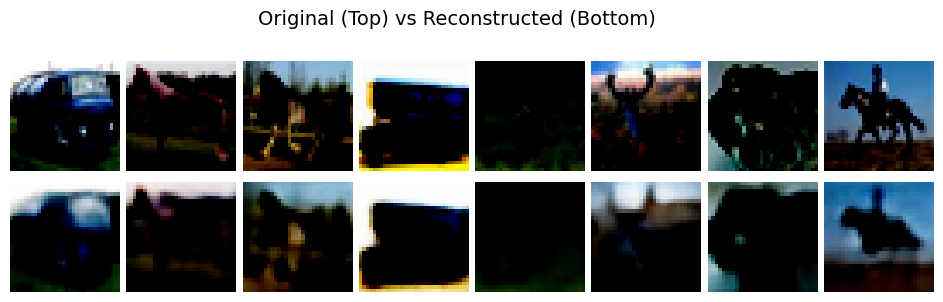

In [14]:
# Pass through the autoencoder
with torch.no_grad():
    recon_images_0_1 = model(images_0_1)

# Convert images to CPU for visualization
recon_images_0_1 = recon_images_0_1.cpu()

# Scale back to [0,255]
recon_images_0_255 = (recon_images_0_1 * 255)

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
plt.subplots_adjust(wspace=0, hspace=0.1)

# Add row titles manually
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    img = images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[0, i].imshow(img)  
    axes[0, i].axis("off")

    # Reconstructed images
    recon_img = recon_images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    recon_img = np.clip(recon_img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[1, i].imshow(recon_img)  
    axes[1, i].axis("off")

plt.show()

In [15]:
#classifier traning

In [16]:
classifier = CIFAR10_121.Classifier(args.latent_dim).to(args.device)
CIFAR10_121.train_classifier(model, classifier, train_loader, val_loader, args, epochs=20)

Epoch [1/20], Train Loss: 2.0171, Train Acc: 31.77%


Epoch [2/20], Train Loss: 1.7315, Train Acc: 38.81%


Epoch [3/20], Train Loss: 1.6857, Train Acc: 40.15%


Epoch [4/20], Train Loss: 1.6542, Train Acc: 41.27%


Epoch [5/20], Train Loss: 1.6428, Train Acc: 42.19%


Epoch [6/20], Train Loss: 1.6338, Train Acc: 42.18%


Epoch [7/20], Train Loss: 1.6235, Train Acc: 42.20%


Epoch [8/20], Train Loss: 1.6138, Train Acc: 42.56%


Epoch [9/20], Train Loss: 1.6084, Train Acc: 42.65%


Epoch [10/20], Train Loss: 1.6029, Train Acc: 42.80%


Epoch [11/20], Train Loss: 1.6048, Train Acc: 42.95%


Epoch [12/20], Train Loss: 1.6009, Train Acc: 43.12%


Epoch [13/20], Train Loss: 1.5962, Train Acc: 43.20%


Epoch [14/20], Train Loss: 1.5948, Train Acc: 43.13%


Epoch [15/20], Train Loss: 1.5897, Train Acc: 43.12%


Epoch [16/20], Train Loss: 1.5917, Train Acc: 43.23%


Epoch [17/20], Train Loss: 1.5879, Train Acc: 43.18%


Epoch [18/20], Train Loss: 1.5856, Train Acc: 43.53%


Epoch [19/20], Train Loss: 1.5783, Train Acc: 43.55%


Epoch [20/20], Train Loss: 1.5797, Train Acc: 43.33%
